In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits 
%matplotlib inline

In [13]:
digits = load_digits()

In [14]:
digits 

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [12]:
digits.data.shape

(1797, 64)

In [15]:
digits.target.shape

(1797,)

In [16]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
len(digits.data[0])

64

In [27]:
img = digits.data[0].reshape(8,8)

In [28]:
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

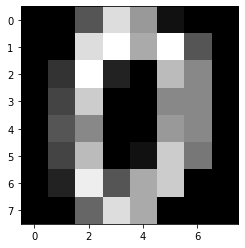

In [29]:
plt.imshow(img,cmap=plt.cm.gray)

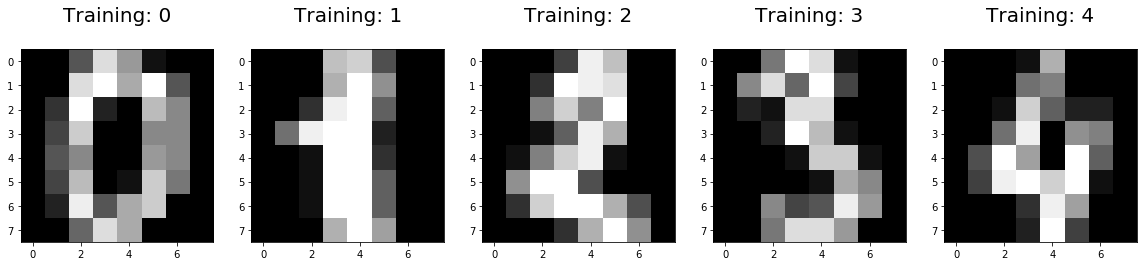

In [32]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],
                                       digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [34]:
print(x_train.shape)

(1383, 64)


In [35]:
print(y_train.shape)

(1383,)


In [36]:
x_test.shape

(414, 64)

In [37]:
y_test.shape

(414,)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = model.predict(x_test[0].reshape(1,-1))

In [41]:
y_pred

array([4])

In [43]:
model.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [52]:
y_pred = model.predict(x_test)

[4 0 9 1 4 7 1 5 1 6 6 7 6 1 5 5 4 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 4 4 7 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 8 5 0 3 9 2 7 3 2 0 8 1 9 2 1 9 1 0 3 4 3 0 9 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 0 0 4 0 0 4 0 6 5 8 8
 3 7 9 2 0 3 2 7 3 0 2 1 5 2 7 0 6 9 3 1 1 3 5 2 3 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 9 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 9 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 5 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 5 5 7 8 0 4 1 4 5 9 2 2 3 9 1 3 9 3 2
 8 0 6 5 6 2 5 2 3 2 6 1 0 7 6 0 6 2 7 0 3 2 4 2 9 6 9 7 7 0 3 5 4 1 2 2 1
 2 7 7 0 4 9 8]
[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 1 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 8 8 9 6 1 7 0 1 9 7 3 3 1 8 8 8 9 8 5 1 4 8 7 5 8 4 3 9 3 8
 7 3 3 0 

In [55]:
import pandas as pd
df = pd.DataFrame({'actual':y_test,'predicted':y_pred})
df.head(5)

,actual,predicted
0,4,4
1,0,0
2,9,9
3,1,1
4,4,8


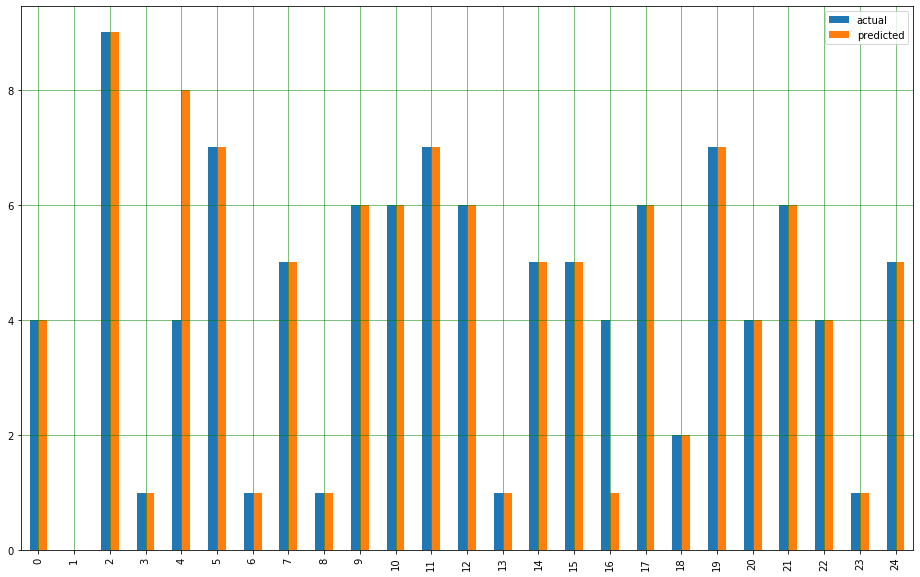

In [59]:
df1 = df.head(25)
#azq
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-'
         ,linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [60]:
score = model.score(x_test,y_test)

In [61]:
score

0.9420289855072463

Text(0.5, 1, 'actual score: 0.9420289855072463')

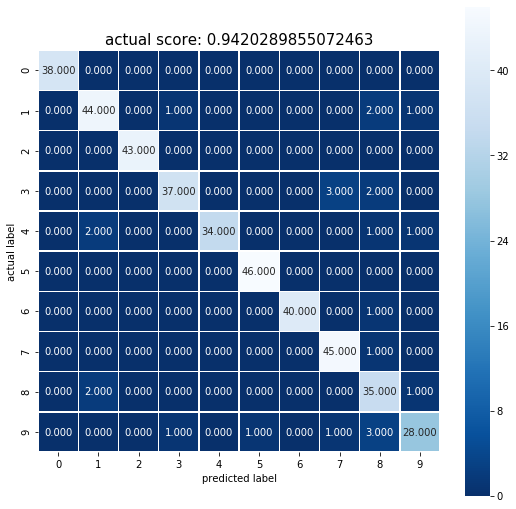

In [66]:
plt.figure(figsize=(9,9))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,
            square=True,cmap='Blues_r')
plt.ylabel('actual label')
plt.xlabel('predicted label')
all_sample_title = ('actual score: {0}'.format(score))
plt.title(all_sample_title, size=15)

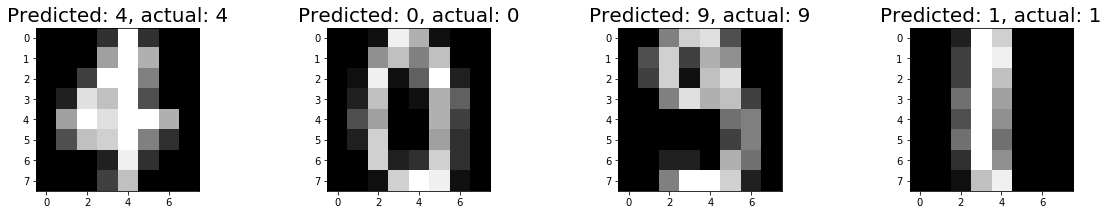

In [68]:
index=0
missclassifiedIndex = []
for predict, actual in zip(y_pred,y_test):
    if(predict==actual):
        missclassifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(missclassifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, actual: {}'.format(y_pred[wrong],y_test[wrong]),fontsize=20 )